<a href="https://colab.research.google.com/github/naveenfab/firstrepo/blob/main/MDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Age')

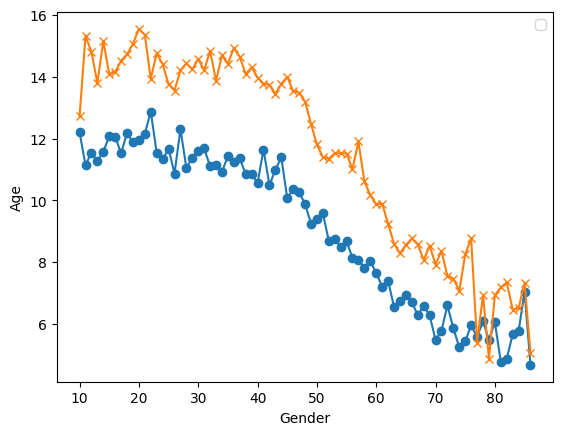

In [1]:
#TASK 1

# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# plot male and female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(lefthanded_data["Age"], lefthanded_data['Female'], marker = 'o') # plot "Female" vs. "Age"
ax.plot(lefthanded_data["Age"], lefthanded_data['Male'],   marker = 'x') # plot "Male" vs. "Age"
ax.legend() # add a legend
ax.set_xlabel("Gender")
ax.set_ylabel("Age")

Text(0, 0.5, 'Birth_year')

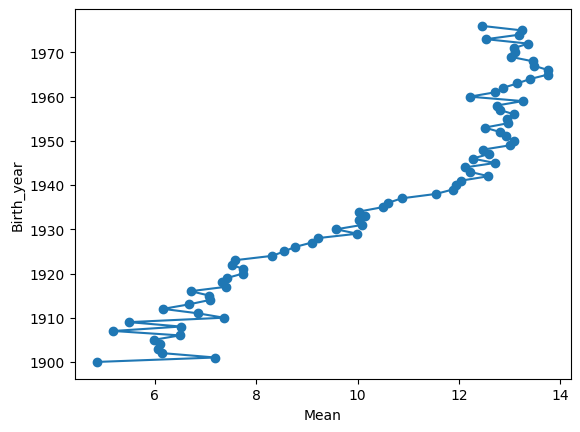

In [2]:
#TASK 2

# create a new column for birth year of each age
lefthanded_data['Birth_year'] = 1986 - lefthanded_data["Age"]

# create a new column for the average of male and female
lefthanded_data["Mean_lh"] = (lefthanded_data["Male"] + lefthanded_data["Female"])/2

# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot(lefthanded_data['Mean_lh'], lefthanded_data['Birth_year'], marker='o') # plot 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel("Mean") # set the x label for the plot
ax.set_ylabel("Birth_year") # set the y label for the plot

In [3]:
#TASK 3

# import library
import numpy as np

# create a function for P(LH | A)
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
    Inputs: numpy array of ages of death, study_year
    Returns: probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death` """

    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean()
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86

    P_return = np.zeros(ages_of_death.shape) # create an empty array to store the results
    # extract rate of left-handedness for people of ages 'ages_of_death'
    P_return[ages_of_death > oldest_age] = early_1900s_rate/100
    P_return[ages_of_death < youngest_age] = late_1900s_rate/100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100

    return P_return

Text(0, 0.5, 'Age')

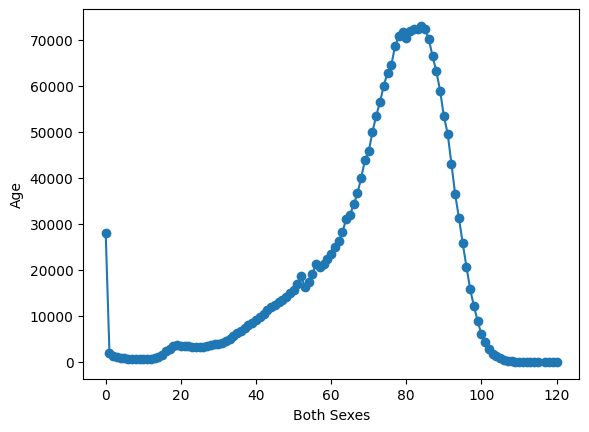

In [4]:
#TASK 4


# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

# drop NaN values from the `Both Sexes` column
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot(death_distribution_data['Age'], death_distribution_data['Both Sexes'], marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Both Sexes')
ax.set_ylabel('Age')

In [5]:
#TAK 5

def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'], study_year) # multiply number of dead people by P_lh_given_A
    p = np.sum(p_list) # calculate the sum of p_list
    return p/np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people (sum of death_distribution_data['Both Sexes'])

print(P_lh(death_distribution_data))

0.07766387615350638


In [6]:
#TASK 6

def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = np.divide(death_distribution_data['Both Sexes'][ages_of_death],np.sum(death_distribution_data['Both Sexes']))
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

In [7]:
#TASK 7

def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = np.divide(death_distribution_data['Both Sexes'][ages_of_death], np.sum(death_distribution_data['Both Sexes']))
    P_right = 1 - P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so P_right = 1 - P_left
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year) # P_rh_A = 1 - P_lh_A
    return P_rh_A*P_A/P_right

Text(0, 0.5, 'Probability of being age A at death')

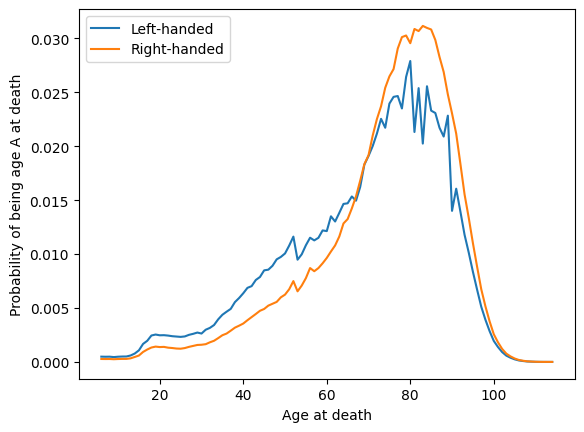

In [8]:
#TASK 8


ages = np.arange(6, 115, 1) # make a list of ages of death to plot

# calculate the probability of being left- or right-handed for each
left_handed_probability = P_A_given_lh(ages, death_distribution_data, study_year = 1990)
right_handed_probability = P_A_given_rh(ages, death_distribution_data, study_year = 1990)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

In [9]:
#TASK 9


# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(np.array(left_handed_probability)*np.array(ages))
average_rh_age =  np.nansum(np.array(right_handed_probability)*np.array(ages))

# print the average ages for each group
print(average_lh_age)
print(average_rh_age)

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_lh_age - average_rh_age, 1)) + " years.")

67.24503662801027
72.79171936526477
The difference in average ages is -5.5 years.


In [11]:
#TASK 10


# Calculate the probability of being left- or right-handed for all ages
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, study_year=2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, study_year=2018)

# calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

print("The difference in average ages is " +
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")


The difference in average ages is 2.3 years.
